# CVXPY approach

In [2]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate data.
m = 200
n = 150
np.random.seed(1)
X = np.random.randn(m, n)
y = np.random.randn(m)

# Define and solve the CVXPY problem.
theta = cp.Variable(n)
cost = cp.sum_squares(X*theta - y)
prob = cp.Problem(cp.Minimize(cost))

prob.solve()
# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal theta is")
print(theta.value)
print("The norm of the residual is ", cp.norm(X*theta - y, p=2).value)


The optimal value is 68.69421967152029
The optimal theta is
[ 0.00222757 -0.04426313 -0.01188268  0.14042236 -0.11235377  0.03640303
 -0.21749808 -0.09374076 -0.14666616 -0.00650745  0.00136044 -0.05821716
  0.30766668  0.1549531  -0.09374016  0.20595234 -0.09570512 -0.08750232
 -0.03600092  0.14407635  0.12238927 -0.04667068 -0.19102953 -0.24369522
 -0.01476296  0.05230506  0.11845806  0.13807033  0.09313426  0.08909073
 -0.07575201  0.02977349 -0.03021938 -0.05046058  0.12626573  0.08643331
  0.14562448  0.18174805  0.25500649 -0.12166898 -0.03595046 -0.06742598
 -0.05171714  0.17596708  0.12338568  0.05939913 -0.01636759 -0.33212826
  0.45016646  0.05446244  0.1655614  -0.09972016 -0.07974855 -0.23842155
 -0.0137969  -0.13495874  0.05146296  0.02771051 -0.01189323 -0.07512697
 -0.21020137  0.10224506 -0.29530639  0.12007457 -0.00305177 -0.05635925
  0.12119773  0.10144352  0.18006111  0.18257559 -0.05731089  0.18862363
 -0.20968091 -0.03321245 -0.1928243  -0.01140871 -0.16041927  0

# Exact solution

In [3]:
# Import packages.
import numpy as np

# Generate data.
m = 200
n = 150
np.random.seed(1)
X = np.random.randn(m, n)
y = np.random.randn(m)

# Calculate pseudo inverse matrix
theta_opt = np.linalg.pinv(X) @ y

# Print result.
print("The optimal theta is")
print(theta_opt)
print("The norm of the residual is ", np.linalg.norm(X @ theta_opt - y))

The optimal theta is
[ 0.00222757 -0.04426313 -0.01188268  0.14042236 -0.11235377  0.03640303
 -0.21749808 -0.09374076 -0.14666616 -0.00650745  0.00136044 -0.05821716
  0.30766668  0.1549531  -0.09374016  0.20595234 -0.09570512 -0.08750232
 -0.03600092  0.14407635  0.12238927 -0.04667068 -0.19102953 -0.24369522
 -0.01476296  0.05230506  0.11845806  0.13807033  0.09313426  0.08909073
 -0.07575201  0.02977349 -0.03021938 -0.05046058  0.12626573  0.08643331
  0.14562448  0.18174805  0.25500649 -0.12166898 -0.03595046 -0.06742598
 -0.05171714  0.17596708  0.12338568  0.05939913 -0.01636759 -0.33212826
  0.45016646  0.05446244  0.1655614  -0.09972016 -0.07974855 -0.23842155
 -0.0137969  -0.13495874  0.05146296  0.02771051 -0.01189323 -0.07512697
 -0.21020137  0.10224506 -0.29530639  0.12007457 -0.00305177 -0.05635925
  0.12119773  0.10144352  0.18006111  0.18257559 -0.05731089  0.18862363
 -0.20968091 -0.03321245 -0.1928243  -0.01140871 -0.16041927  0.07881591
  0.08512089 -0.20137112  0.31

# Time comparison

In [0]:
# Imports and definitions.
import cvxpy as cp
import numpy as np
import time
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

def solve_lls_cvxpy(X, y):
  m,n = X.shape
  theta = cp.Variable(n)
  cost = cp.sum_squares(X*theta - y)
  prob = cp.Problem(cp.Minimize(cost))
  prob.solve()
  return theta.value

def solve_lls_exact(X, y):
  return np.linalg.pinv(X) @ y

def solve_lls_exact_man(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

def solve_lls_chol(X, y):
    res = scipy.linalg.cho_factor(X.T @ X, lower=True)
    return scipy.linalg.cho_solve(res, X.T @ y)

def solve_lls_qr(X, y):
    Q, R = scipy.linalg.qr(X)
    return scipy.linalg.solve_triangular(R, Q.T @ y)

def plot_timing(ns, time_arrays, labels):
  for time_array, label in zip(time_arrays, labels):
    plt.semilogy(ns, time_array, label=label)

  plt.title('Random square linear system')
  plt.ylabel('Time, s')
  plt.xlabel(r'$n$, dimension of the problem')    
  plt.legend()
  plt.plot()

  return None

In [0]:
np.random.seed(1)
times_cvxpy     = []
times_exact     = []
times_exact_man = []
times_chol      = []
times_qr        = []

labels = ['cvxpy', 'pinv', 'exact', 'chol', 'qr']


ns = np.linspace(1, 2000).astype(int)

for n in ns:
  print('Solving for {}'.format(n))
  X = np.random.randn(n, n)
  y = np.random.randn(n)

  start_time = time.time()
  solve_lls_cvxpy(X, y)
  end_time = time.time()
  times_cvxpy.append(end_time - start_time)

  start_time = time.time()
  solve_lls_exact_man(X, y)
  end_time = time.time()
  times_exact_man.append(end_time - start_time)

  start_time = time.time()
  solve_lls_exact(X, y)
  end_time = time.time()
  times_exact.append(end_time - start_time)

  start_time = time.time()
  solve_lls_chol(X, y)
  end_time = time.time()
  times_chol.append(end_time - start_time)

  start_time = time.time()
  solve_lls_qr(X, y)
  end_time = time.time()
  times_qr.append(end_time - start_time)

plot_timing(ns, [times_cvxpy, times_exact, times_exact_man, times_chol, times_qr], labels)
plt.savefig('lls_times.svg')

Solving for 1
Solving for 41
Solving for 82
Solving for 123
Solving for 164
Solving for 204
Solving for 245
Solving for 286
Solving for 327
Solving for 368
Solving for 408
Solving for 449
Solving for 490
Solving for 531
Solving for 572
Solving for 612
Solving for 653
Solving for 694
Solving for 735
Solving for 776
Solving for 816
Solving for 857
Solving for 898
Solving for 939
Solving for 980


# Non-linear fitting with linear least squares

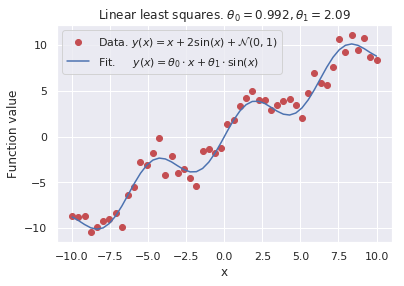

In [0]:
# Generate the data
x = np.linspace(-10, 10)
y = x + 2*np.sin(x) + np.random.randn(*x.shape)

X = np.zeros((len(x), 2))
X[:, 0], X[:, 1] = x, np.sin(x)

# Solve lls problem
theta = solve_lls_exact(X, y)

# PLot the results
plt.xlabel('x')
plt.ylabel('Function value')
plt.plot(x, y, 'ro', label=r'Data. $y(x) =  x + 2\sin (x) +  \mathcal{N}(0,1)$')
plt.plot(x, theta[0]*x + theta[1]*np.sin(x), label=r'Fit.     $y(x) = \theta_0 \cdot x + \theta_1 \cdot \sin (x)$')
plt.title(r'Linear least squares. $\theta_0 = {:.3}, \theta_1 = {:.3}$'.format(*theta))
plt.legend()
# plt.show()
plt.savefig('non_linear_fit.svg')